In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Mounting Google drive to Colab for file access !

In [0]:
from google.colab import drive
root_dir = '/content/drive/My Drive/fellowship/Datasets/AerialImagerySamples/'
drive.mount('/content/drive', force_remount=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading the dataset images from the URL mentioned in the inria site using curl cmd. This command downloads the dataset as 7z parts and then unzips it under the folder AerialImageDataset under /content.

In [0]:
# Do not execute !! Already downloaded datasets !
!curl -k https://files.inria.fr/aerialimagelabeling/getAerial.sh | bash

Simce the dataset is huge, copy a few sample files(ending with 1.tif, 2.tif etc.) for initial training to google drive. Repeat the same for test folder.

In [0]:
import os, shutil, pathlib

def move_dir(src: str, dst: str):
  if not os.path.isdir(dst):
    print("creating dir not present", dst)
    pathlib.Path(dst).mkdir(parents=True, exist_ok=True)
  for file in os.listdir(src):
    for endpat in ('1.tif','2.tif','3.tif','4.tif', '5.tif'):
      if file.endswith(endpat):
        print("moving file", file)
        shutil.move(os.path.join(src, f), os.path.join(dst, f))
        
move_dir("/content/AerialImageDataset/train/gt",
         "/content/drive/My Drive/fellowship/Datasets/AerialImageDataset/train/gt")

move_dir("/content/AerialImageDataset/train/images",
         "/content/drive/My Drive/fellowship/Datasets/AerialImageDataset/train/images")

move_dir("/content/AerialImageDataset/test/images",
         "/content/drive/My Drive/fellowship/Datasets/AerialImageDataset/test/images")
    

Import required fastai libraries

In [0]:
from fastai.vision import *
import fastai
print(fastai.__version__)

1.0.52


Check the sample images  and their dimensions in train and test folders

In [0]:
root_path = Path(root_dir)
path = root_path/'train'
path_mask = path/'gt'
path_img = path/'images'
path_img, path_mask

(PosixPath('/content/drive/My Drive/fellowship/Datasets/AerialImagerySamples/train/images'),
 PosixPath('/content/drive/My Drive/fellowship/Datasets/AerialImagerySamples/train/gt'))

In [0]:
images = get_image_files(path_img)
masks = get_image_files(path_mask)
len(images),len(masks)

(35, 35)

In [0]:
# Size of each image and its mask
image = open_image(images[0])
img_size = np.array(image.shape[1:])
print(image.shape)
print(img_size)

mask = open_mask(masks[0], div=True)
print(mask.shape)
mask_size = np.array(mask.shape[1:])
print(mask_size)
print(mask.data)

np.unique(np.array(mask.data))

torch.Size([3, 5000, 5000])
[5000 5000]
torch.Size([1, 5000, 5000])
[5000 5000]
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]])


array([0, 1])

Function to get the corresponding mask file (labels) of an image file (inputs)

In [0]:
get_mask_file = lambda x: path_mask/f'{x.stem.split("/")[-1]}.tif'
img = images[0]
img, get_mask_file(img)

(PosixPath('/content/drive/My Drive/fellowship/Datasets/AerialImagerySamples/train/images/vienna15.tif'),
 PosixPath('/content/drive/My Drive/fellowship/Datasets/AerialImagerySamples/train/gt/vienna15.tif'))

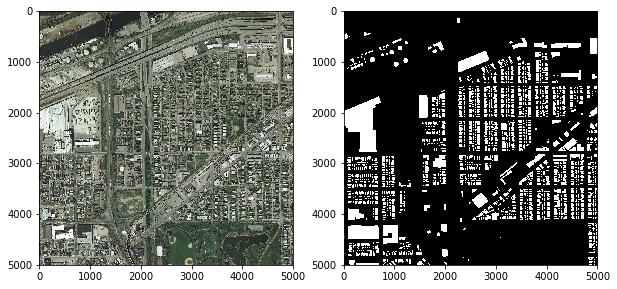

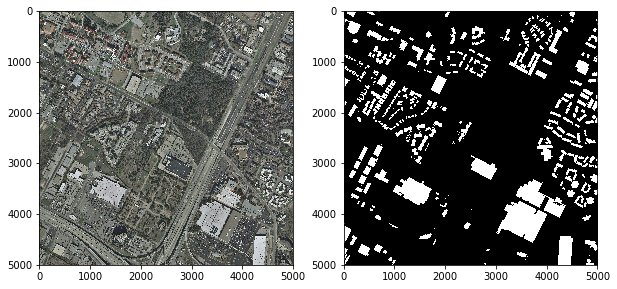

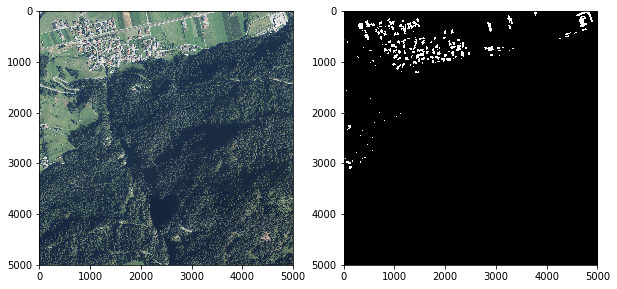

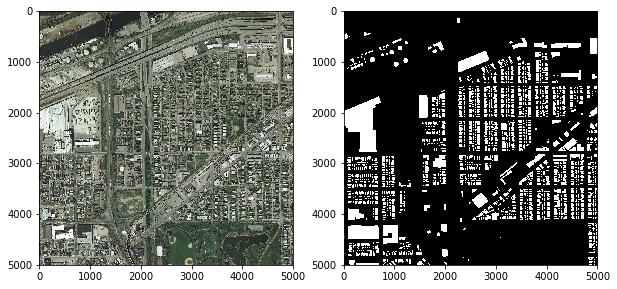

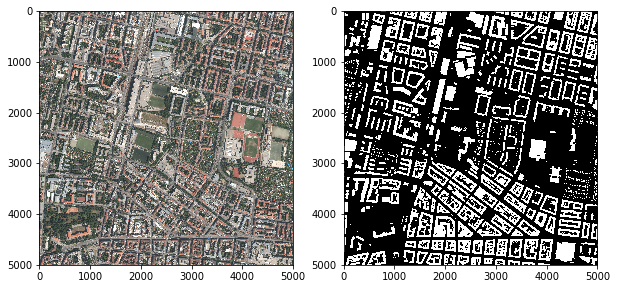

In [0]:
import matplotlib.pyplot as plt

'''Display a sample of random images as their corresponding masks'''
def display_image_mask_grid(n):
  images_list = []
  for i in range(n):
    images_list.append(random.choice(os.listdir(path_img)))
  for idx, image in enumerate(images_list):  
    fig, axs = plt.subplots(1, 2, figsize=(10, 10))
    img = plt.imread(str(path_img/image))
    axs[0].imshow(img)
    msk = plt.imread(str(path_mask/image))
    axs[1].imshow(msk, cmap='gray')    
    plt.grid(False)
    plt.show()  
    

display_image_mask_grid(5)